In [69]:
import os
import numpy as np
import matplotlib.pyplot as plt
import json

In [70]:
datasets_outlog =["swe", "diffre2d", "incompNS", 
                  "compNS_Rand_M0.1_res128_0", "compNS_Rand_M1.0_res128_0",
                  "compNS_Rand_M0.1_res128_1", "compNS_Rand_M1.0_res128_1",
                  "compNS_Rand_M0.1_res512","compNS_Rand_M1.0_res512",
                  "compNS_Turb_M0.1_res512","compNS_Turb_M1.0_res512"]
#[note for compNS]there are 8 cases
# 1. Rand (T=21, H=128, W=128): 4 sets of parameters ([$\eta, \zeta (=\eta \text{ in data}), Ma$]; [0.01, 0.01, 0.1], [0.1, 0.1, 0.1], [0.01, 0.01, 1.0], [0.1, 0.1, 1.0])  
# 2. Rand (T=21, H=512, W=512): 2 sets of parameters ([$\eta, \zeta, Ma$]; [1e-8, 1e-8, 0.1], [1e-8, 1e-8, 1.0])  
# 3. Turb (T=21, H=512, W=512): 2 sets of parameters ([$\eta, \zeta, Ma$]; [1e-8, 1e-8, 0.1], [1e-8, 1e-8, 1.0])
# for the compNS_Rand_*_res128 results, each contains 2 cases with eta=zeta=0.01 and 0.1.

In [71]:
##NRMSE from table 1
##SWE, DiffRe2D, CNS M1.0[aggregated across eta and zeta], CNS M0.1[aggregated across eta and zeta]
data_cases=["SWE","DiffRe2D","CNS-M1.0","CNS-M0.1"]
data_cases=["swe", "diffre2d", "CNS-M1.0","CNS-M0.1"]
model_UNet=[0.083, 0.84, 0.4725, 1.6650]
model_FNO =[0.0044, 0.12, 0.1685, 0.2425]
model_PINN=[0.017, 1.6, None, None]
model_ORAC_B=[0.0060, 0.82, None, None]
model_MPP_Ti=[0.0066, 0.0168, 0.0442, 0.0312]
model_MPP_S=[0.0039, 0.0112, 0.0319, 0.0213]
model_MPP_B=[0.0024, 0.0106, 0.0281, 0.0172]
model_MPP_L=[0.0022, 0.0098, 0.0208, 0.0147]

In [72]:
##NRMSE from tables 7&8 in Appendix D in MPP paper;
##CNS M0.1[R-eta = 1e−8, R-eta = 1e−2, R-eta = 1e−1, T-eta = 1e−8], table 7
data_cases_CNS0p1 = ["compNS_Rand_M0.1_res512","compNS_Rand_M0.1_res128_0","compNS_Rand_M0.1_res128_1","compNS_Turb_M0.1_res512"]
model_UNet_CNS0p1=[0.66, 0.71, 5.1, 0.19]
model_FNO_CNS0p1 =[ 0.28, 0.17, 0.36, 0.16]
model_PINN_CNS0p1=[None, None, None, None,]
model_ORAC_B_CNS0p1=[None, None, None, None]
model_MPP_Ti_CNS0p1=[0.0493, 0.0274, 0.0116, 0.0339]
model_MPP_S_CNS0p1=[0.0335, 0.0176, 0.0071, 0.0217]
model_MPP_B_CNS0p1=[0.0286, 0.0162, 0.0078, 0.0169]
model_MPP_L_CNS0p1=[0.0234, 0.0145, 0.0099, 0.0136]

##CNS M1.0[R-eta = 1e−8, R-eta = 1e−2, R-eta = 1e−1, T-eta = 1e−8], table 8
data_cases_CNS1p0 = ["compNS_Rand_M1.0_res512","compNS_Rand_M1.0_res128_0","compNS_Rand_M1.0_res128_1","compNS_Turb_M1.0_res512"]
model_UNet_CNS1p0=[0.47, 0.36, 0.92, 0.14]
model_FNO_CNS1p0 =[0.35, 0.096, 0.098, 0.13]
model_PINN_CNS1p0=[None, None, None, None,]
model_ORAC_B_CNS1p0=[None, None, None, None]
model_MPP_Ti_CNS1p0=[0.0615, 0.0327, 0.0171, 0.0594]
model_MPP_S_CNS1p0=[0.0451, 0.0223, 0.0108, 0.0425]
model_MPP_B_CNS1p0=[0.0386, 0.0195, 0.0119, 0.0365]
model_MPP_L_CNS1p0=[0.0314, 0.0171, 0.0132, 0.0282]

In [73]:
models =["UNet","FNO","PINN","ORAC_B","MPP_Ti","MPP_S", "MPP_B", "MPP_L"]
baseline={}
for dataset in datasets_outlog:
    baseline[dataset]={}
    baseline[dataset]["model"] = models
    if dataset in data_cases:
        idat = data_cases.index(dataset)
        baseline[dataset]["nrmse"]=[model_UNet[idat], model_FNO[idat],model_PINN[idat], model_ORAC_B[idat], model_MPP_Ti[idat], model_MPP_S[idat], model_MPP_B[idat], model_MPP_L[idat]]
    elif dataset in data_cases_CNS0p1:
        idat = data_cases_CNS0p1.index(dataset)
        baseline[dataset]["nrmse"]=[model_UNet_CNS0p1[idat], model_FNO_CNS0p1[idat],model_PINN_CNS0p1[idat], model_ORAC_B_CNS0p1[idat], model_MPP_Ti_CNS0p1[idat], model_MPP_S_CNS0p1[idat], model_MPP_B_CNS0p1[idat], model_MPP_L_CNS0p1[idat]]
    elif dataset in data_cases_CNS1p0:
        idat = data_cases_CNS1p0.index(dataset)
        baseline[dataset]["nrmse"]=[model_UNet_CNS1p0[idat], model_FNO_CNS1p0[idat],model_PINN_CNS1p0[idat], model_ORAC_B_CNS1p0[idat], model_MPP_Ti_CNS1p0[idat], model_MPP_S_CNS1p0[idat], model_MPP_B_CNS1p0[idat], model_MPP_L_CNS1p0[idat]]
    else:
        print(f"unkown dataset: {dataset}")


unkown dataset: incompNS


In [74]:
def read_minibatch_trainhistory(file_names, nbatches_artifical=1, start_words='Epoch'):
    train_loss = []
    train_epoch = []
    for file_name in file_names:
        with open(file_name, 'r') as f:
            for row in f:
                if row.startswith(start_words):
                    epoch = int(row.split()[1])-1
                    batch = int(row.split()[3])
                    loss = float(row.split()[-1])
                    train_epoch.append(epoch+batch/float(nbatches_artifical))
                    train_loss.append(loss)

    return train_epoch, train_loss

In [75]:
def read_epoch_log(file_names, start_words='DONE SYNCING - NOW LOGGING'):
    train_time = []
    valid_time = []
    postproces_time = []
    train_loss = []
    valid_loss = []
    epochs = []
    for file_name in file_names:
        with open(file_name, 'r') as f:
            for row in f:
                if row.startswith(start_words):
                    line = next(f)
                    assert line.startswith("Time for train")
                    train_time.append(float(line.split()[3][:-1]))
                    valid_time.append(float(line.split()[6][:-1]))
                    #postproces_time.append(float(line.split()[-1][:-1]))

                    line = next(f)
                    assert line.startswith("Time taken for epoch")
                    epochs.append(int(line.split()[4]))

                    line = next(f)
                    assert line.startswith("Train loss:")
                    try:
                        train_loss.append(float(line.split()[2][:-1]))
                    except: #Train loss: tensor([0.5132], device='cuda:0'). Valid loss: 0.33667054772377014
                        train_loss.append(float(line.split()[2][8:14]))
                    valid_loss.append(float(line.split()[-1][:-1]))

    return epochs, train_time, valid_time, train_loss, valid_loss

In [76]:
def read_json(filename):
    with open(filename) as f_in:
        return json.load(f_in)

In [77]:
def get_outloghistory(file_names):
    config_hist = {}
    config_hist["epoch"] = []
    for filename in file_names:
        left=filename.rfind("epoch") + len("epoch")
        epoch = int(filename[left:-5])
        config = read_json(filename)
        config_hist["epoch"].append(epoch)
        for k, v in config.items():
            if k in config_hist:
                config_hist[k].append(v)
            else:
                config_hist[k] = [v]
    print(config_hist.keys())
    return config_hist

In [78]:
def get_logfiles(dir, end_words='.out'):
    files=[]
    for file in os.listdir(dir):
        if file.endswith(end_words):
            files.append(os.path.join(dir, file))
    return sorted(files)

In [79]:
def get_outlogfiles(dir, start_words='train_log_epoch'):
    files=[]
    epochs = []
    for file in os.listdir(dir):
        if file.startswith(start_words):
            files.append(os.path.join(dir, file))
            epochs.append(int(file[len('train_log_epoch'):-5]))
    return zip(*sorted(zip(epochs, files)))

In [80]:
cases = ["tiny", "big"]
cases_out =["~/MPP_N4","~/MPP_N4_b"]
output_dir = "../outputs"
output_log={}
for case in cases_out: 
    output_log[case]={}
    epochs, log_dirs = get_outlogfiles(os.path.join(output_dir, case, "basic_config/demo"))
    print(len(log_dirs), log_dirs)
    output_log[case]["outlogfiles"]=log_dirs
    config_hist = get_outloghistory(log_dirs) 
    #print(config_hist)
    output_log[case]["config_hist"] = config_hist

49 ('../outputs/~/MPP_N4/basic_config/demo/train_log_epoch63.json', '../outputs/~/MPP_N4/basic_config/demo/train_log_epoch64.json', '../outputs/~/MPP_N4/basic_config/demo/train_log_epoch65.json', '../outputs/~/MPP_N4/basic_config/demo/train_log_epoch66.json', '../outputs/~/MPP_N4/basic_config/demo/train_log_epoch67.json', '../outputs/~/MPP_N4/basic_config/demo/train_log_epoch68.json', '../outputs/~/MPP_N4/basic_config/demo/train_log_epoch69.json', '../outputs/~/MPP_N4/basic_config/demo/train_log_epoch70.json', '../outputs/~/MPP_N4/basic_config/demo/train_log_epoch71.json', '../outputs/~/MPP_N4/basic_config/demo/train_log_epoch72.json', '../outputs/~/MPP_N4/basic_config/demo/train_log_epoch73.json', '../outputs/~/MPP_N4/basic_config/demo/train_log_epoch74.json', '../outputs/~/MPP_N4/basic_config/demo/train_log_epoch75.json', '../outputs/~/MPP_N4/basic_config/demo/train_log_epoch76.json', '../outputs/~/MPP_N4/basic_config/demo/train_log_epoch77.json', '../outputs/~/MPP_N4/basic_config/de

In [81]:
def get_record(output_log, case):
    epochs_minibatch = output_log[case]["epochs_minibatch"]
    train_minibatch_loss = output_log[case]["train_minibatch_loss"]
    epochs = output_log[case]["epochs"]  
    train_time = output_log[case]["train_time"] 
    valid_time=output_log[case]["valid_time"] 
    train_loss = output_log[case]["train_loss"] 
    valid_loss = output_log[case]["valid_loss"]
    return epochs, train_time, valid_time, train_loss, valid_loss, epochs_minibatch, train_minibatch_loss

In [82]:
def plot_loss(ax, epochs, train_loss, valid_loss, epochs_minibatch=None, train_minibatch_loss=None, case=""):
    if epochs_minibatch is not None:
        ax.plot(epochs_minibatch, train_minibatch_loss, alpha=0.2)
    ax.plot(epochs, train_loss, label=case+'-Train')
    ax.plot(epochs, valid_loss, label=case+'-valid')
    return ax

In [83]:
def plot_time(ax, epochs, train_time, valid_time, case=""):
    ax.plot(epochs, train_time, label=case+'-Train')
    ax.plot(epochs, valid_time, label=case+'-valid')
    return ax

In [84]:
def get_record_config(output_log, case, label="nrmse", dataset = "incompNS"):
    config_hist = output_log[case]["config_hist"]
    epochs = config_hist["epoch"]
    record = {}
    for k, v in config_hist.items():
        idata = k.find("/")
        ilabel= k.rfind(label)
        if label in k and dataset in k:
            #print(k, v)
            record[k[idata+1:ilabel-1]] = v
    return epochs, record
    

swe ~/MPP_N4 [63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111] dict_keys(['valid', 'h_valid'])
swe ~/MPP_N4_b [72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223

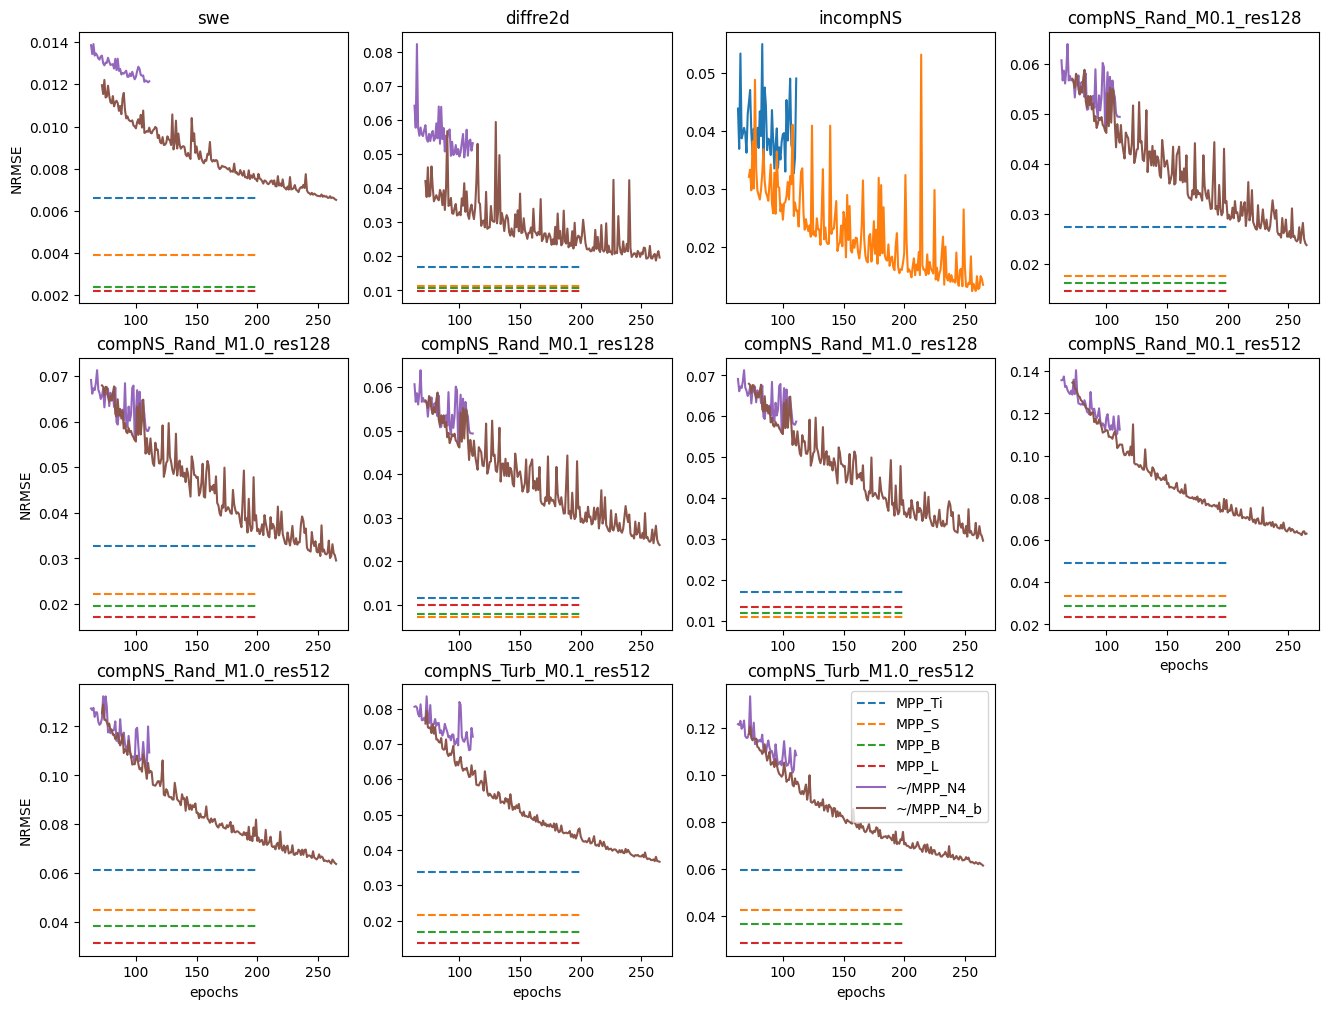

In [85]:
metric ="nrmse"
dataset = "incompNS"
fig = plt.figure(figsize=(16, 12))
for idat, dataset in enumerate(datasets_outlog):
   if dataset in baseline and "nrmse" in baseline[dataset]:
      baseline_nrmses = baseline[dataset]["nrmse"]
      baseline_models = baseline[dataset]["model"]
   else:
      baseline_nrmses = None
   if "128" in dataset:
      dataset = dataset[:-2]
   ax=fig.add_subplot(3,4,1+idat)
   if baseline_nrmses is not None:
      for model, nrmse in zip(baseline_models[4:], baseline_nrmses[4:]):
         ax.plot([65, 200],[nrmse, nrmse], "--", label=model)

   for case in cases_out:
      epochs, record=get_record_config(output_log, case, label=metric, dataset=dataset)
      print(dataset, case, epochs, record.keys())
      ax.plot(epochs, record["valid"], label=case)
      ax.set_title(dataset)
      if idat>6:
         ax.set_xlabel("epochs")
      if idat%4==0:
         ax.set_ylabel("NRMSE")
      #ax.set_yscale("log")
ax.legend()